In [25]:
#Question 1
import sqlite3
import pandas as pd
df = pd.read_csv('data/heart.csv')
# Establish a connection to the SQLite database
conn = sqlite3.connect('heart_disease.db')

In [26]:
df.to_sql('heart_data', conn, if_exists='replace', index=False)


303

In [27]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM heart_data LIMIT 13")
rows = cursor.fetchall()
for row in rows:
    print(row)

('63;1;3;145;233;1;0;150;0;2.3;0;0;1;1',)
('37;1;2;130;250;0;1;187;0;3.5;0;0;2;1',)
('41;0;1;130;204;0;0;172;0;1.4;2;0;2;1',)
('56;1;1;120;236;0;1;178;0;0.8;2;0;2;1',)
('57;0;0;120;354;0;1;163;1;0.6;2;0;2;1',)
('57;1;0;140;192;0;1;148;0;0.4;1;0;1;1',)
('56;0;1;140;294;0;0;153;0;1.3;1;0;2;1',)
('44;1;1;120;263;0;1;173;0;0;2;0;3;1',)
('52;1;2;172;199;1;1;162;0;0.5;2;0;3;1',)
('57;1;2;150;168;0;1;174;0;1.6;2;0;2;1',)
('54;1;0;140;239;0;1;160;0;1.2;2;0;2;1',)
('48;0;2;130;275;0;1;139;0;0.2;2;0;2;1',)
('49;1;1;130;266;0;1;171;0;0.6;2;0;2;1',)


In [28]:
#Question 1 -End
conn.close()

In [29]:
#Question 2 Start
conn = sqlite3.connect('heart_disease.db')

df = pd.read_sql_query("SELECT * FROM heart_data", conn)


conn.close()


df.head()

,age;sex;cp;trestbps;chol;fbs;restecg;thalach;exang;oldpeak;slope;ca;thal;target
0,63;1;3;145;233;1;0;150;0;2.3;0;0;1;1
1,37;1;2;130;250;0;1;187;0;3.5;0;0;2;1
2,41;0;1;130;204;0;0;172;0;1.4;2;0;2;1
3,56;1;1;120;236;0;1;178;0;0.8;2;0;2;1
4,57;0;0;120;354;0;1;163;1;0.6;2;0;2;1


In [30]:
#Question 2.1
#function to check each data point in the DataFrame 
missing_values = df.isnull().sum()
print(missing_values)


age;sex;cp;trestbps;chol;fbs;restecg;thalach;exang;oldpeak;slope;ca;thal;target    0
dtype: int64


In [31]:
#missing values from data frame 'df' and create a new data frame 'f_cleaned'
df_cleaned = df.dropna()
with open('data/heart.csv', 'r') as file:
    lines = file.readlines()
    for line in lines[:15]:
        print(line)

age;sex;cp;trestbps;chol;fbs;restecg;thalach;exang;oldpeak;slope;ca;thal;target

63;1;3;145;233;1;0;150;0;2.3;0;0;1;1

37;1;2;130;250;0;1;187;0;3.5;0;0;2;1

41;0;1;130;204;0;0;172;0;1.4;2;0;2;1

56;1;1;120;236;0;1;178;0;0.8;2;0;2;1

57;0;0;120;354;0;1;163;1;0.6;2;0;2;1

57;1;0;140;192;0;1;148;0;0.4;1;0;1;1

56;0;1;140;294;0;0;153;0;1.3;1;0;2;1

44;1;1;120;263;0;1;173;0;0;2;0;3;1

52;1;2;172;199;1;1;162;0;0.5;2;0;3;1

57;1;2;150;168;0;1;174;0;1.6;2;0;2;1

54;1;0;140;239;0;1;160;0;1.2;2;0;2;1

48;0;2;130;275;0;1;139;0;0.2;2;0;2;1

49;1;1;130;266;0;1;171;0;0.6;2;0;2;1

64;1;3;110;211;0;0;144;1;1.8;1;0;2;1



In [32]:
#using ';' as the delimiter and store the data in a dataframe 'df'
df = pd.read_csv('data/heart.csv', delimiter=';')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
# Column-wise traverse through the dataframe
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


df_cleaned = df.dropna()

# Print the data 
print(df_cleaned.dtypes)



age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns (of types 'int64' and 'float64') from the cleaned data frame and convert them to a list
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_columns)


# Create a MinMaxScaler object
scaler = MinMaxScaler()


df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])


df_cleaned.head()

Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [35]:
#Question 2a
# Loop through all columns in the dataframe
for column in df.columns:
    # Convert each column to numeric type, setting any errors (for non-numeric values) to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

#clean data
df_cleaned = df.dropna()


# Print the data types 
print(df_cleaned.dtypes)

# Select columns with data type int64 or float64, convert to a list and assign to numeric_columns
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Print the list of numeric columns
print("Numeric columns:", numeric_columns)

# Initialize a MinMaxScaler object
scaler = MinMaxScaler()


df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Print 
df_cleaned.head()

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


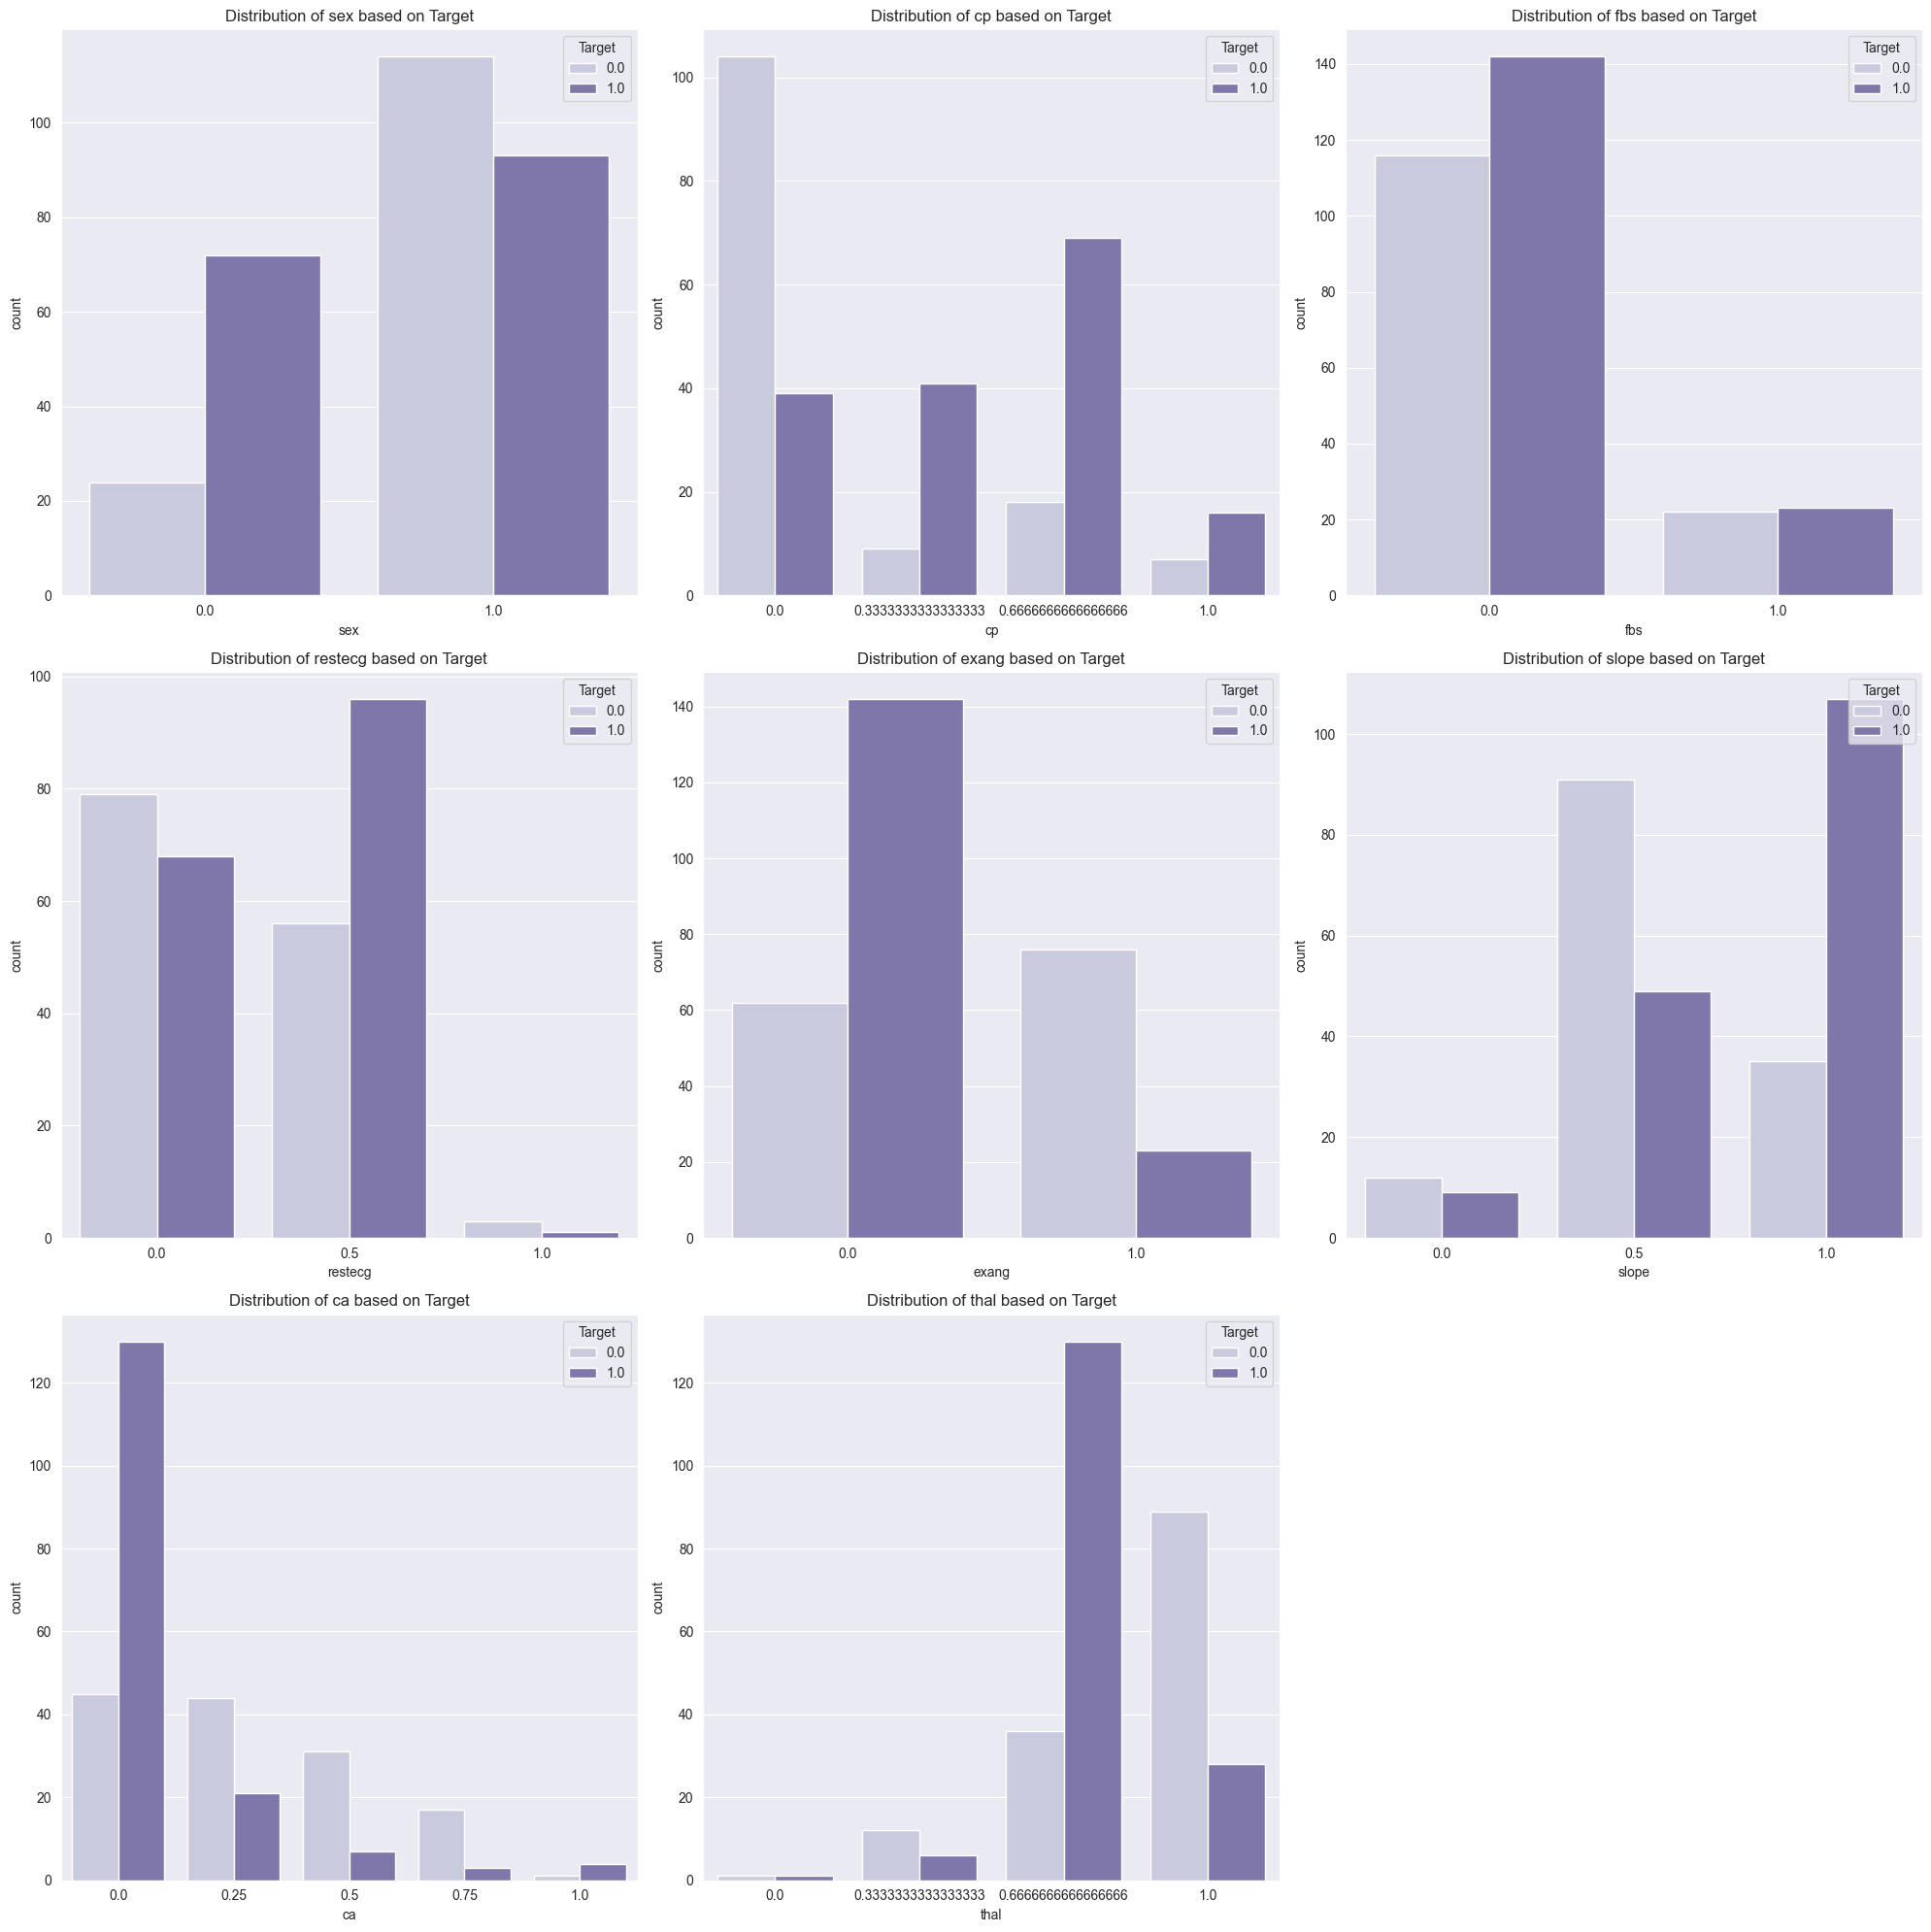

In [36]:
#Question 2B- End 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is already defined and cleaned
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 20))

# Loop over categorical_columns with both index as well as value
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_cleaned, x=column, hue='target', palette='Purples')
    plt.title(f'Distribution of {column} based on Target')
    plt.legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()


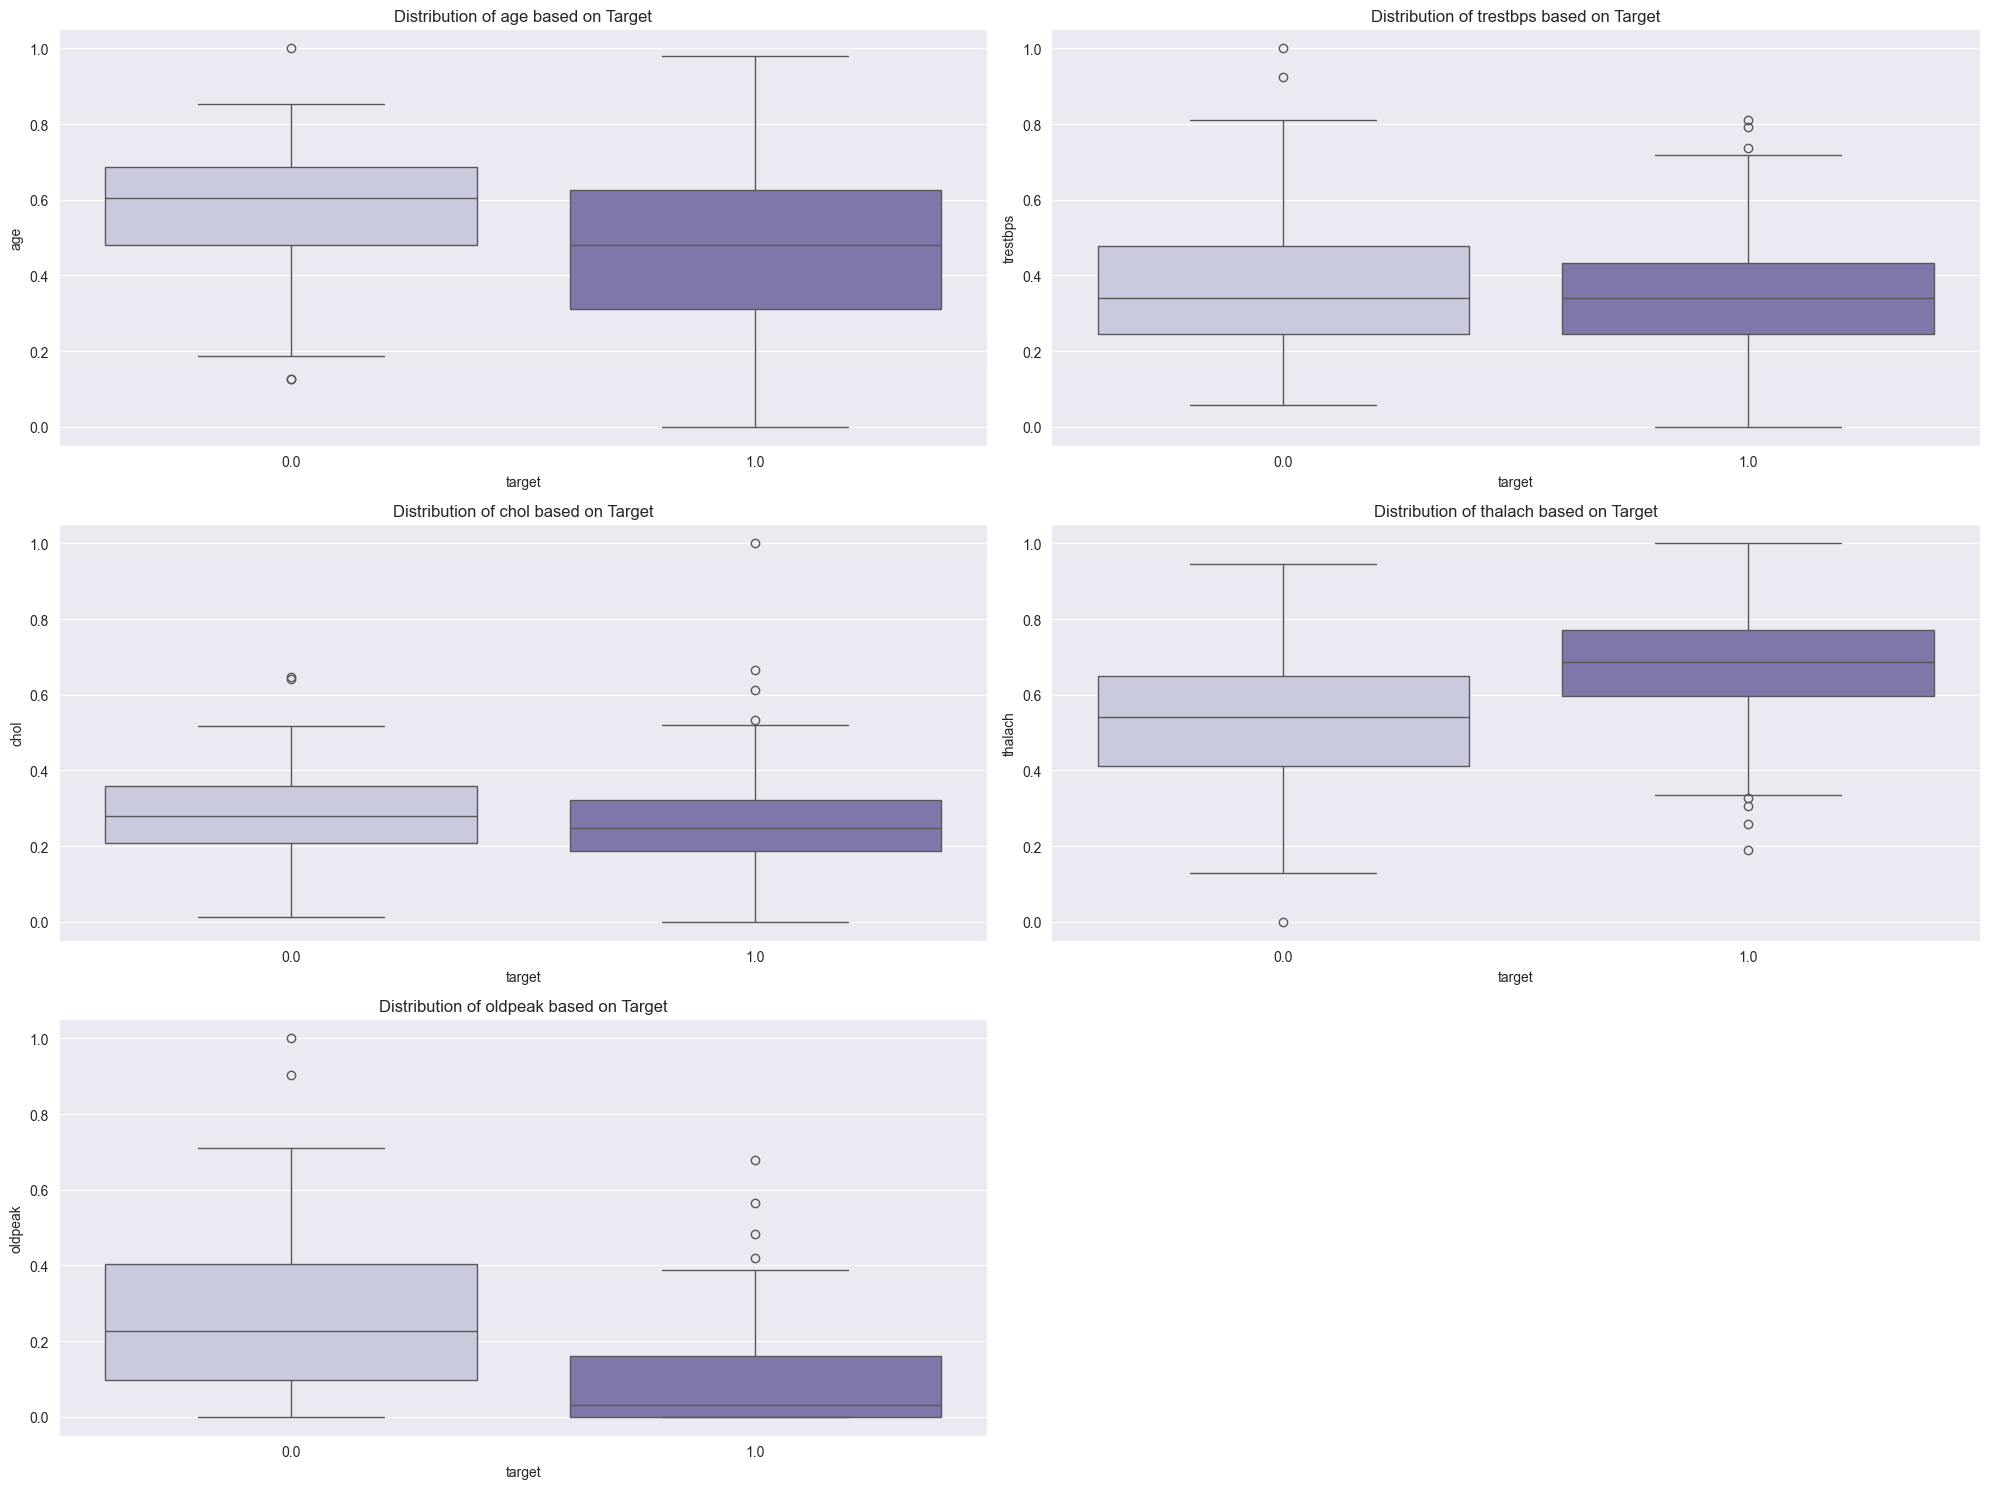

In [37]:
#Qustion 2.1 C
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is already defined and cleaned
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df_cleaned, x='target', y=column, hue='target', palette='Purples', dodge=False)
    plt.title(f'Distribution of {column} based on Target')
    plt.legend([],[], frameon=False)  # Remove the legend as it's redundant

plt.tight_layout()
plt.show()


In [41]:
#Question 3.1 Start
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset with the correct delimiter
df = pd.read_csv('data/heart.csv', delimiter=';')

# Check if the DataFrame is empty after loading
if df.empty:
    print('The loaded DataFrame is empty. Check your input data and file path.')
else:
    print("Initial DataFrame:")
    print(df.head())
    print("Data types before cleaning:")
    print(df.dtypes)

    # Remove rows with missing values
    df_cleaned = df.dropna()

    print("DataFrame after dropping NaNs:")
    print(df_cleaned.head())
    print("Data types after cleaning:")
    print(df_cleaned.dtypes)

    # Select numeric columns
    numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("Numeric columns identified:")
    print(numeric_columns)

    if not numeric_columns:
        print("The cleaned DataFrame doesn't have any numeric columns. Check your data types.")
    else:
        # Initialize a MinMaxScaler object
        scaler = MinMaxScaler()

        # Transform the numeric columns with scaling
        df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

        # Check if DataFrame is empty after scaling
        if df_cleaned.empty:
            print('DataFrame is empty after scaling. Check your scaling process.')
        else:
            # If 'target' column exists in the cleaned DataFrame, proceed with the rest of your process
            if 'target' in df_cleaned.columns:
                X = df_cleaned.drop(columns=['target'])
                y = df_cleaned['target']

                # Splitting the data into train and test sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Print the shapes of the resultant sets
                print(f'X_train shape: {X_train.shape}')
                print(f'X_test shape: {X_test.shape}')
                print(f'y_train shape: {y_train.shape}')
                print(f'y_test shape: {y_test.shape}')
            else:
                print("'target' column not found in DataFrame.")
                
#Question 3.1 End


Initial DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Data types before cleaning:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
DataFrame after dropping NaNs:
   age  s

In [42]:
#Question 3.2 start

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Initialize all three models
lr = LogisticRegression()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()

# Create a list of models
models = [lr, knn, gbc]

highest_accuracy = 0
best_model = None

# Standardize the data for models that benefit from it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the models and perform predictions
for model in models:
    try:
        if isinstance(model, (LogisticRegression, KNeighborsClassifier)):
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        print(f'Accuracy of {type(model).__name__}: {accuracy:.4f}')

        # If the current model performs better than the previous ones, save it
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            best_model = model

    except Exception as e:
        print(f"Error fitting {type(model).__name__}: {e}")

# Save the best model to disk
dump(best_model, 'best_model.joblib')


#Question 3.2 End


Accuracy of LogisticRegression: 0.8525
Accuracy of KNeighborsClassifier: 0.9016
Accuracy of GradientBoostingClassifier: 0.7869


['best_model.joblib']